Task 5: MOVIE RATING PREDICTION WITH PYTHON


• Build a model that predicts the rating of a movie based on features
like genre, director, and actors. You can use regression techniques to
tackle this problem.

• The goal is to analyze historical movie data and develop a model that
accurately estimates the rating given to a movie by users or critics.

• Movie Rating Prediction project enables you to explore data analysis,
preprocessing, feature engineering, and machine learning modeling
techniques. It provides insights into the factors that influence movie
ratings and allows you to build a model that can estimate the ratings
of movies accurately.

DATASET – [CLICK ME](https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies)

In [1]:
import pandas as pd
df = pd.read_csv('IMDb Movies India.csv', encoding='latin-1')

In [2]:
df.shape

(15509, 10)

In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(5659, 10)

In [9]:
df['Votes'] = df['Votes'].str.replace(',','').astype('int')
df['Year'] = df['Year'].str.strip('()').astype(int)
df['Duration'] = df['Duration'].str.strip('min')

In [10]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


Drama          3796
Action         1686
Romance        1380
Comedy         1344
Crime           875
Thriller        679
Family          416
Musical         412
Mystery         304
Adventure       277
Horror          202
Fantasy         146
Biography       115
History          99
Music            53
Documentary      48
Sport            40
Animation        40
War              33
Sci-Fi           32
News              1
Western           1
Name: count, dtype: int64
Index(['Drama', 'Action', 'Romance', 'Comedy', 'Crime', 'Thriller', 'Family',
       'Musical', 'Mystery', 'Adventure', 'Horror', 'Fantasy', 'Biography',
       'History', 'Music', 'Documentary', 'Sport', 'Animation', 'War',
       'Sci-Fi', 'News', 'Western'],
      dtype='object')
[3796 1686 1380 1344  875  679  416  412  304  277  202  146  115   99
   53   48   40   40   33   32    1    1]


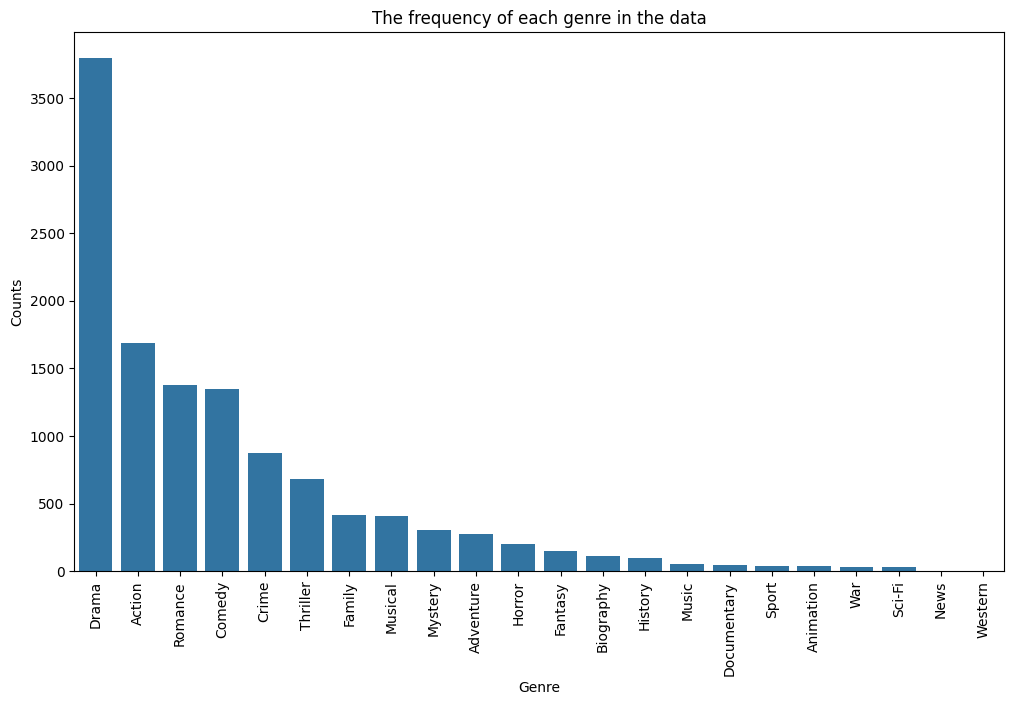

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
movies_genre = df['Genre'].str.split(', ',expand=True).stack().value_counts()
labels = movies_genre.keys()
count = movies_genre.values
print(movies_genre)
print(labels)
print(count)
plt.figure(figsize=(12,7))
sns.barplot(x=labels,y=count)
plt.xticks(rotation=90)
plt.title('The frequency of each genre in the data')
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Actor 1'] = encoder.fit_transform(df['Actor 1'])
df['Actor 2'] = encoder.fit_transform(df['Actor 2'])
df['Actor 3'] = encoder.fit_transform(df['Actor 3'])
df['Genre'] = encoder.fit_transform(df['Genre'])
df['Director'] = encoder.fit_transform(df['Director'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   int64  
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   int64  
 7   Actor 1   5659 non-null   int64  
 8   Actor 2   5659 non-null   int64  
 9   Actor 3   5659 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 615.4+ KB


In [13]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,229,7.0,8,629,1352,2272,319
3,#Yaaram,2019,110,184,4.4,35,1335,1198,719,2148
5,...Aur Pyaar Ho Gaya,1997,147,157,4.7,827,1530,378,75,2045
6,...Yahaan,2005,142,289,7.4,1086,2044,692,1112,2524
8,?: A Question Mark,2012,82,320,5.6,326,135,1934,1175,1013


In [14]:
X = df.drop(columns=['Name', 'Rating'])
Y = df['Rating']

In [15]:
from sklearn.preprocessing import MinMaxScaler
df[['Year', 'Duration', 'Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']] = MinMaxScaler().fit_transform(df[['Year', 'Duration', 'Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']])

In [16]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),0.977778,0.293333,0.610667,7.0,0.000005,0.258848,0.690148,0.979310,0.124853
3,#Yaaram,0.977778,0.296667,0.490667,4.4,0.000051,0.549383,0.611536,0.309914,0.840705
5,...Aur Pyaar Ho Gaya,0.733333,0.420000,0.418667,4.7,0.001390,0.629630,0.192956,0.032328,0.800391
6,...Yahaan,0.822222,0.403333,0.770667,7.4,0.001828,0.841152,0.353241,0.479310,0.987867
8,?: A Question Mark,0.900000,0.203333,0.853333,5.6,0.000543,0.055556,0.987238,0.506466,0.396477
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,0.933333,0.313333,0.610667,6.1,0.000681,0.503292,0.949974,0.776293,0.632094
15494,Zubeidaa,0.777778,0.440000,0.354667,6.2,0.002521,0.847325,0.389484,0.697845,0.463405
15503,Zulm Ki Zanjeer,0.644444,0.346667,0.074667,5.8,0.000066,0.737860,0.207249,0.325000,0.659491
15505,Zulmi,0.755556,0.360000,0.101333,4.5,0.001099,0.421811,0.057172,0.932759,0.122896


In [17]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=43)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def compare_regression_models(models, X_train, x_test, Y_train, y_test):
    for name, model in models.items():
        model.fit(X_train, Y_train)

        # Predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(x_test)

        # Training scores
        train_mae = mean_absolute_error(Y_train, y_pred_train)
        train_mse = mean_squared_error(Y_train, y_pred_train)
        train_r2 = r2_score(Y_train, y_pred_train)

        # Testing scores
        test_mae = mean_absolute_error(y_test, y_pred_test)
        test_mse = mean_squared_error(y_test, y_pred_test)
        test_r2 = r2_score(y_test, y_pred_test)

        print(f"Model: {name}")
        print(f"Training MAE: {train_mae}")
        print(f"Training MSE: {train_mse}")
        print(f"Training R^2: {train_r2}")
        print(f"Testing MAE: {test_mae}")
        print(f"Testing MSE: {test_mse}")
        print(f"Testing R^2: {test_r2}")
        print("-------------------------------")

# Defining regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR(),
}

compare_regression_models(models, X_train, x_test, Y_train, y_test)

Model: Linear Regression
Training MAE: 1.0487052448735539
Training MSE: 1.7510198812768605
Training R^2: 0.09177919615364616
Testing MAE: 1.0212094270384748
Testing MSE: 1.6458348592522796
Testing R^2: 0.0977467000342036
-------------------------------
Model: Decision Tree Regressor
Training MAE: 4.1201119535459755e-18
Training MSE: 5.750477108966952e-33
Training R^2: 1.0
Testing MAE: 1.1762367491166077
Testing MSE: 2.4317756183745582
Testing R^2: -0.3331091902207024
-------------------------------
Model: Random Forest Regressor
Training MAE: 0.31200728959575863
Training MSE: 0.17618997327148211
Training R^2: 0.908613602355214
Testing MAE: 0.8484681978798586
Testing MSE: 1.2307337597173145
Testing R^2: 0.3253067950032724
-------------------------------
Model: Gradient Boosting Regressor
Training MAE: 0.7678392488185721
Training MSE: 1.0255780132824894
Training R^2: 0.46805213487847674
Testing MAE: 0.8319418091291576
Testing MSE: 1.1732786927326673
Testing R^2: 0.3568038941777334
------